**Import**

In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.3/915.3 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import pickle
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

from ultralytics import YOLO

import torchvision
import torchvision.transforms as transforms
import os
from PIL import Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Dataset**

In [9]:
# Define paths to save the dataset
train_dir = '/content/cifar10/train'
val_dir = '/content/cifar10/val'

# Create directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Define a transform to convert the data to tensor
transform = transforms.ToTensor()

# Download CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
valset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Get class names (labels)
classes = trainset.classes

# Helper function to save images to the disk in the appropriate structure
def save_images(dataset, save_dir):
    for idx, (image, label) in enumerate(dataset):
        class_name = classes[label]
        class_dir = os.path.join(save_dir, class_name)
        os.makedirs(class_dir, exist_ok=True)

        # Convert tensor image to PIL Image
        img = transforms.ToPILImage()(image)
        # Save the image
        img.save(f'{class_dir}/{idx}.png')

# Save train and validation images
save_images(trainset, train_dir)
save_images(valset, val_dir)



100%|██████████| 170M/170M [00:03<00:00, 48.4MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


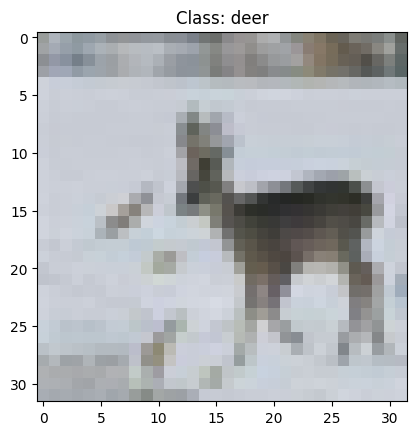

In [10]:
# Display an example image from CIFAR-10
example_image, example_label = trainset[20]
plt.imshow(transforms.ToPILImage()(example_image))
plt.title(f'Class: {classes[example_label]}')
plt.show()

**YOLOv11-cls model**

In [11]:
model = YOLO("yolo11x-cls.pt")
# model = YOLO('/content/drive/My Drive/temp/yolo11x-cls-final.pt')

results = model.train(data='/content/cifar10', epochs=50, imgsz=32, batch=64)

100%|██████████| 56.9M/56.9M [00:00<00:00, 61.0MB/s]


Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolo11x-cls.pt, data=/content/cifar10, epochs=50, time=None, patience=100, batch=64, imgsz=32, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

100%|██████████| 5.35M/5.35M [00:00<00:00, 113MB/s]


AMP: checks passed ✅


train: Scanning /content/cifar10/train... 50000 images, 0 corrupt: 100%|██████████| 50000/50000 [00:05<00:00, 8809.14it/s]


train: New cache created: /content/cifar10/train.cache


val: Scanning /content/cifar10/val... 10000 images, 0 corrupt: 100%|██████████| 10000/10000 [00:01<00:00, 7104.07it/s]


val: New cache created: /content/cifar10/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 82 weight(decay=0.0), 83 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 32 train, 32 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/50     0.705G      2.889         64         32:   0%|          | 3/782 [00:00<03:22,  3.85it/s]

       1/50     0.707G      2.907         64         32:   1%|          | 8/782 [00:01<01:50,  7.00it/s]
100%|██████████| 755k/755k [00:00<00:00, 25.9MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:05<00:00, 13.27it/s]

                   all      0.643      0.963



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 17.92it/s]


                   all      0.714      0.981

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:05<00:00, 14.69it/s]


                   all      0.683      0.965

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 17.22it/s]

                   all      0.769      0.986



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:05<00:00, 15.71it/s]

                   all      0.814      0.991



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 16.55it/s]

                   all      0.827      0.992



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 17.85it/s]

                   all      0.818      0.991



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:05<00:00, 13.86it/s]

                   all      0.837      0.992



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 17.68it/s]

                   all      0.852      0.993



      Epoch    GPU_mem       loss  Instances       Size


      10/50     0.695G     0.7073         16         32: 100%|██████████| 782/782 [01:50<00:00,  7.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:05<00:00, 13.26it/s]

                   all      0.857      0.994



      Epoch    GPU_mem       loss  Instances       Size


      11/50     0.693G     0.6765         16         32: 100%|██████████| 782/782 [01:50<00:00,  7.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 17.71it/s]

                   all      0.862      0.995



      Epoch    GPU_mem       loss  Instances       Size


      12/50     0.695G     0.6742         16         32: 100%|██████████| 782/782 [01:51<00:00,  7.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:06<00:00, 13.15it/s]

                   all      0.864      0.995



      Epoch    GPU_mem       loss  Instances       Size


      13/50     0.695G     0.6642         16         32: 100%|██████████| 782/782 [01:50<00:00,  7.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 17.42it/s]


                   all      0.872      0.995

      Epoch    GPU_mem       loss  Instances       Size


      14/50     0.693G     0.6404         16         32: 100%|██████████| 782/782 [01:50<00:00,  7.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:05<00:00, 13.38it/s]

                   all       0.88      0.996



      Epoch    GPU_mem       loss  Instances       Size


      15/50     0.695G     0.6276         16         32: 100%|██████████| 782/782 [01:50<00:00,  7.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 17.47it/s]

                   all      0.882      0.997



      Epoch    GPU_mem       loss  Instances       Size


      16/50     0.693G     0.6165         16         32: 100%|██████████| 782/782 [01:51<00:00,  7.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:05<00:00, 13.26it/s]


                   all      0.888      0.997

      Epoch    GPU_mem       loss  Instances       Size


      17/50     0.693G     0.5911         16         32: 100%|██████████| 782/782 [01:50<00:00,  7.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 17.99it/s]

                   all      0.892      0.996



      Epoch    GPU_mem       loss  Instances       Size


      18/50     0.695G     0.5917         16         32: 100%|██████████| 782/782 [01:51<00:00,  7.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:05<00:00, 13.31it/s]

                   all      0.892      0.997



      Epoch    GPU_mem       loss  Instances       Size


      19/50     0.695G      0.581         16         32: 100%|██████████| 782/782 [01:50<00:00,  7.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 17.60it/s]

                   all      0.894      0.997



      Epoch    GPU_mem       loss  Instances       Size


      20/50     0.699G     0.5671         16         32: 100%|██████████| 782/782 [01:50<00:00,  7.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:05<00:00, 13.54it/s]


                   all      0.898      0.997

      Epoch    GPU_mem       loss  Instances       Size


      21/50     0.695G     0.5632         16         32: 100%|██████████| 782/782 [01:50<00:00,  7.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 17.70it/s]

                   all      0.898      0.997



      Epoch    GPU_mem       loss  Instances       Size


      22/50     0.697G     0.5439         16         32: 100%|██████████| 782/782 [01:50<00:00,  7.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:05<00:00, 15.14it/s]

                   all        0.9      0.997



      Epoch    GPU_mem       loss  Instances       Size


      23/50     0.693G     0.5374         16         32: 100%|██████████| 782/782 [01:50<00:00,  7.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 18.04it/s]

                   all      0.904      0.998



      Epoch    GPU_mem       loss  Instances       Size


      24/50     0.693G     0.5232         16         32: 100%|██████████| 782/782 [01:50<00:00,  7.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 17.17it/s]


                   all      0.906      0.998

      Epoch    GPU_mem       loss  Instances       Size


      25/50     0.695G     0.5051         16         32: 100%|██████████| 782/782 [01:49<00:00,  7.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:05<00:00, 14.80it/s]

                   all      0.907      0.997



      Epoch    GPU_mem       loss  Instances       Size


      26/50     0.693G     0.5064         16         32: 100%|██████████| 782/782 [01:51<00:00,  7.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 17.84it/s]

                   all      0.907      0.997



      Epoch    GPU_mem       loss  Instances       Size


      27/50     0.695G     0.4928         16         32: 100%|██████████| 782/782 [01:51<00:00,  7.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:05<00:00, 15.51it/s]

                   all      0.908      0.997



      Epoch    GPU_mem       loss  Instances       Size


      28/50     0.695G     0.4904         16         32: 100%|██████████| 782/782 [01:51<00:00,  7.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 17.86it/s]

                   all      0.908      0.997



      Epoch    GPU_mem       loss  Instances       Size


      29/50     0.693G     0.4696         16         32: 100%|██████████| 782/782 [01:50<00:00,  7.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:05<00:00, 13.80it/s]

                   all      0.908      0.998



      Epoch    GPU_mem       loss  Instances       Size


      30/50     0.695G      0.465         16         32: 100%|██████████| 782/782 [01:49<00:00,  7.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 18.22it/s]


                   all      0.909      0.997

      Epoch    GPU_mem       loss  Instances       Size


      31/50     0.693G     0.4524         16         32: 100%|██████████| 782/782 [01:49<00:00,  7.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:05<00:00, 15.00it/s]

                   all      0.909      0.997



      Epoch    GPU_mem       loss  Instances       Size


      32/50     0.695G     0.4409         16         32: 100%|██████████| 782/782 [01:49<00:00,  7.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 17.47it/s]

                   all       0.91      0.998



      Epoch    GPU_mem       loss  Instances       Size


      33/50     0.695G     0.4231         16         32: 100%|██████████| 782/782 [01:49<00:00,  7.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 17.67it/s]

                   all       0.91      0.998



      Epoch    GPU_mem       loss  Instances       Size


      34/50     0.695G     0.4214         16         32: 100%|██████████| 782/782 [01:48<00:00,  7.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:05<00:00, 13.22it/s]

                   all       0.91      0.998



      Epoch    GPU_mem       loss  Instances       Size


      35/50     0.695G      0.404         16         32: 100%|██████████| 782/782 [01:49<00:00,  7.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 18.22it/s]

                   all      0.911      0.998



      Epoch    GPU_mem       loss  Instances       Size


      36/50     0.693G     0.4005         16         32: 100%|██████████| 782/782 [01:49<00:00,  7.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 18.18it/s]

                   all      0.911      0.998



      Epoch    GPU_mem       loss  Instances       Size


      37/50     0.693G     0.3808         16         32: 100%|██████████| 782/782 [01:49<00:00,  7.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:05<00:00, 13.61it/s]

                   all      0.912      0.997



      Epoch    GPU_mem       loss  Instances       Size


      38/50     0.695G     0.3733         16         32: 100%|██████████| 782/782 [01:49<00:00,  7.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 18.69it/s]

                   all      0.912      0.998



      Epoch    GPU_mem       loss  Instances       Size


      39/50     0.695G      0.358         16         32: 100%|██████████| 782/782 [01:49<00:00,  7.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 16.15it/s]

                   all      0.913      0.998



      Epoch    GPU_mem       loss  Instances       Size


      40/50     0.695G     0.3467         16         32: 100%|██████████| 782/782 [01:49<00:00,  7.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 16.41it/s]

                   all      0.914      0.998



      Epoch    GPU_mem       loss  Instances       Size


      41/50     0.695G     0.3308         16         32: 100%|██████████| 782/782 [01:49<00:00,  7.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 18.29it/s]

                   all      0.915      0.998



      Epoch    GPU_mem       loss  Instances       Size


      42/50     0.695G     0.3189         16         32: 100%|██████████| 782/782 [01:48<00:00,  7.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:05<00:00, 13.27it/s]

                   all      0.916      0.998



      Epoch    GPU_mem       loss  Instances       Size


      43/50     0.699G     0.3111         16         32: 100%|██████████| 782/782 [01:49<00:00,  7.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 18.32it/s]

                   all      0.916      0.998



      Epoch    GPU_mem       loss  Instances       Size


      44/50     0.695G     0.2987         16         32: 100%|██████████| 782/782 [01:49<00:00,  7.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 17.79it/s]

                   all      0.917      0.998



      Epoch    GPU_mem       loss  Instances       Size


      45/50     0.699G     0.2808         16         32: 100%|██████████| 782/782 [01:52<00:00,  6.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 17.44it/s]

                   all      0.917      0.998



      Epoch    GPU_mem       loss  Instances       Size


      46/50     0.695G     0.2735         16         32: 100%|██████████| 782/782 [01:52<00:00,  6.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:05<00:00, 13.88it/s]

                   all      0.918      0.998



      Epoch    GPU_mem       loss  Instances       Size


      47/50     0.693G     0.2569         16         32: 100%|██████████| 782/782 [01:51<00:00,  7.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 16.90it/s]

                   all      0.918      0.998



      Epoch    GPU_mem       loss  Instances       Size


      48/50     0.693G     0.2476         16         32: 100%|██████████| 782/782 [01:52<00:00,  6.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:05<00:00, 13.28it/s]

                   all      0.919      0.998



      Epoch    GPU_mem       loss  Instances       Size


      49/50     0.693G     0.2324         16         32: 100%|██████████| 782/782 [01:50<00:00,  7.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 17.24it/s]

                   all      0.919      0.998



      Epoch    GPU_mem       loss  Instances       Size


      50/50     0.695G     0.2225         16         32: 100%|██████████| 782/782 [01:50<00:00,  7.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:05<00:00, 13.70it/s]

                   all       0.92      0.998



50 epochs completed in 1.625 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 57.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 57.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.77 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11x-cls summary (fused): 94 layers, 28,345,226 parameters, 0 gradients, 110.3 GFLOPs
train: /content/cifar10/train... found 50000 images in 10 classes ✅ 
val: /content/cifar10/val... found 10000 images in 10 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 79/79 [00:04<00:00, 19.51it/s]


                   all      0.919      0.998
Speed: 0.0ms preprocess, 0.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


In [12]:
!ls /content/runs/classify/train
# !ls /content/drive/MyDrive/temp

args.yaml					   train_batch1.jpg	  val_batch1_labels.jpg
confusion_matrix_normalized.png			   train_batch2.jpg	  val_batch1_pred.jpg
confusion_matrix.png				   train_batch31280.jpg   val_batch2_labels.jpg
events.out.tfevents.1740004449.84c9eb50bf99.813.0  train_batch31281.jpg   val_batch2_pred.jpg
results.csv					   train_batch31282.jpg   weights
results.png					   val_batch0_labels.jpg
train_batch0.jpg				   val_batch0_pred.jpg


In [13]:
import shutil
# Source CSV file
src = '/content/runs/classify/train/results.csv'

# Destination folder in your Google Drive
dst_dir = '/content/drive/MyDrive/temp/'
dst = os.path.join(dst_dir, 'yolo11_results.csv')

# Create the directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# Copy the file
shutil.copy(src, dst)
print("CSV file copied successfully!")

CSV file copied successfully!


Columns in CSV: Index(['epoch', 'time', 'train/loss', 'metrics/accuracy_top1',
       'metrics/accuracy_top5', 'val/loss', 'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


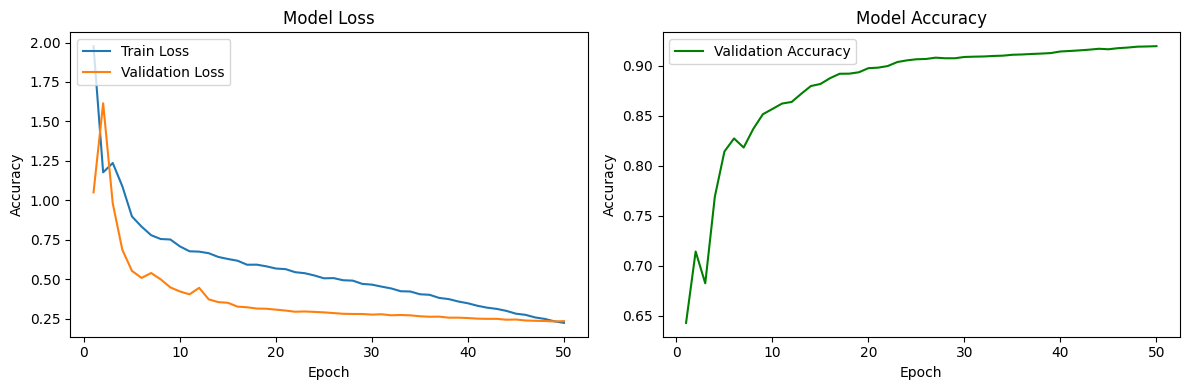

In [4]:
# Locate the CSV log file from your experiment folder
csv_file = '/content/drive/MyDrive/temp/yolo11_results.csv'
df = pd.read_csv(csv_file)

# Optional: print the column names to check what's available
print("Columns in CSV:", df.columns)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(df['epoch'], df['metrics/accuracy_top1'], label='Validation Accuracy', color='green')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(df['epoch'], df['train/loss'], label='Train Loss')
plt.plot(df['epoch'], df['val/loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


**Save**

In [15]:
model.save('/content/drive/My Drive/temp/yolo11x-cls-final.pt')

In [ ]:
model = YOLO('/content/drive/My Drive/temp/yolo11x-cls-final.pt')